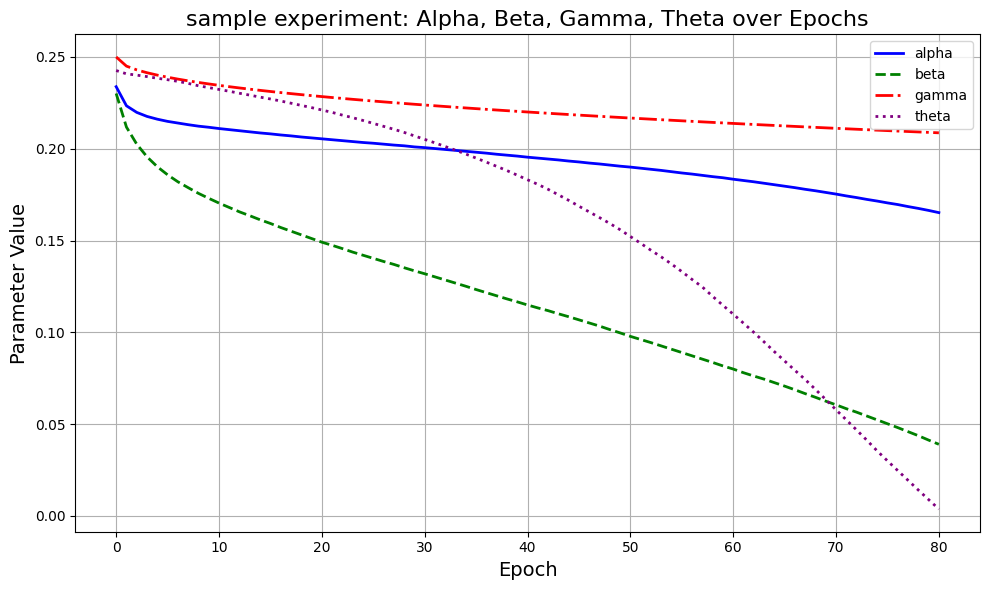

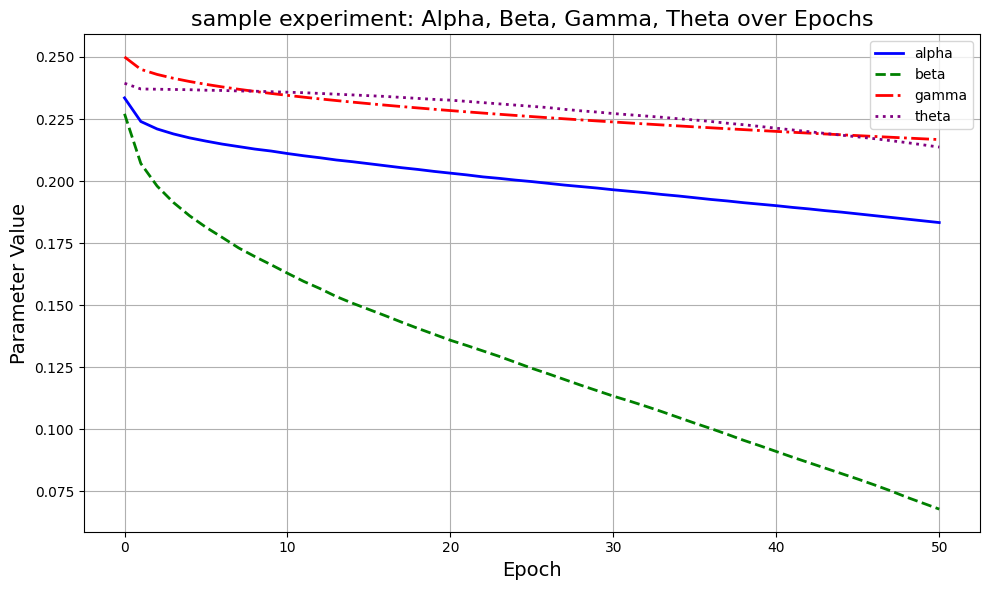

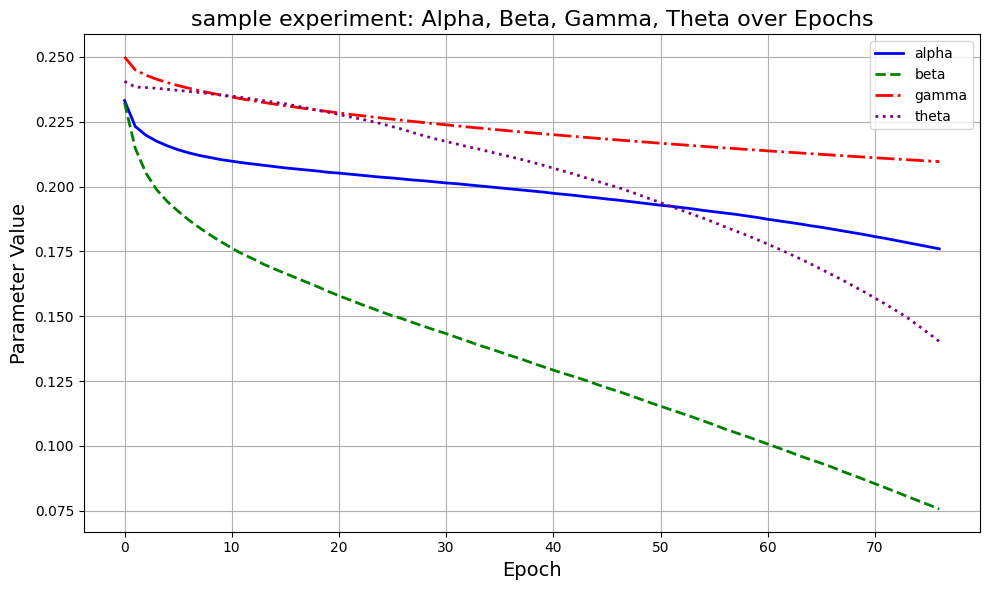

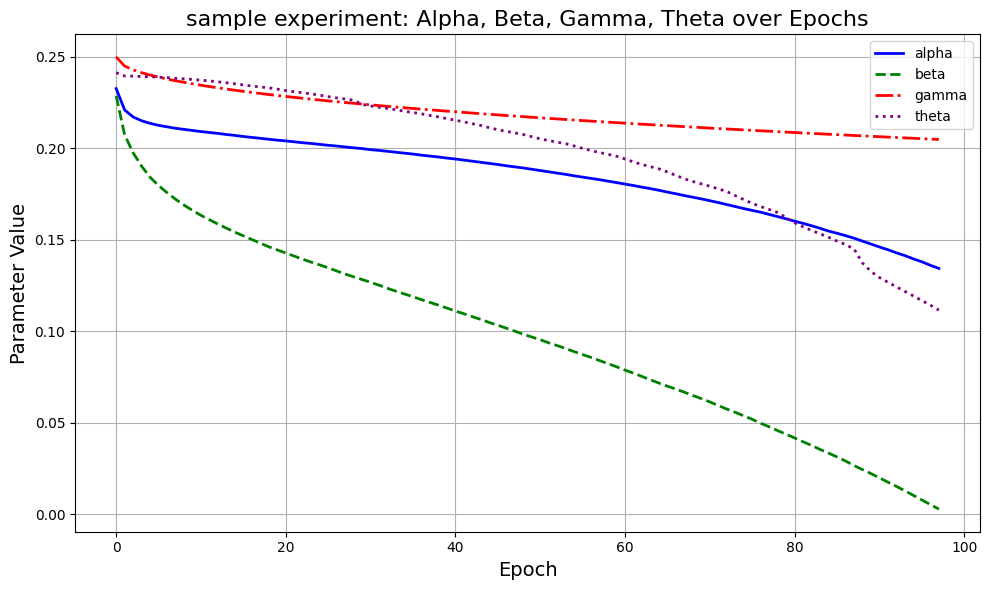

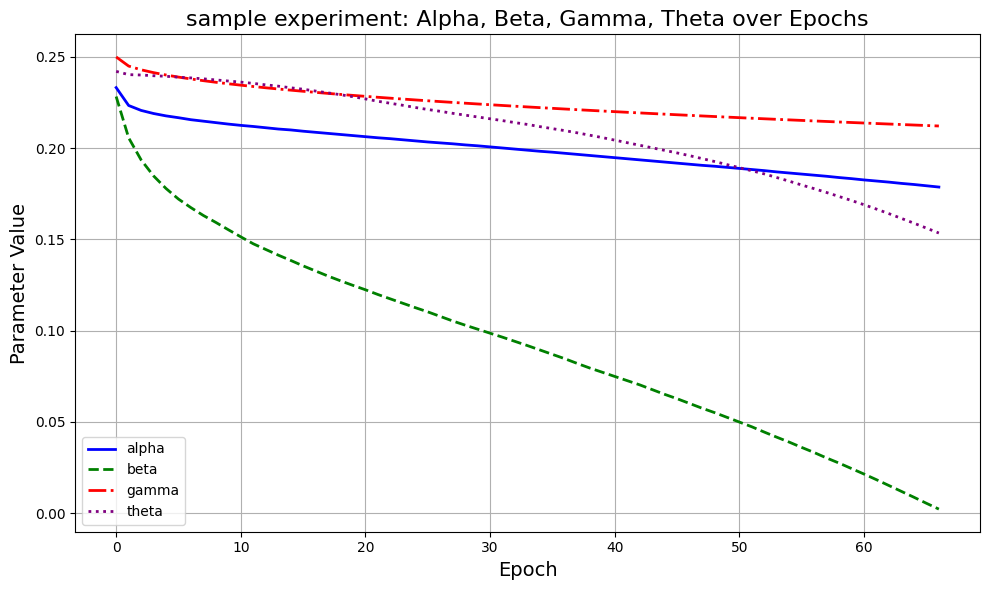

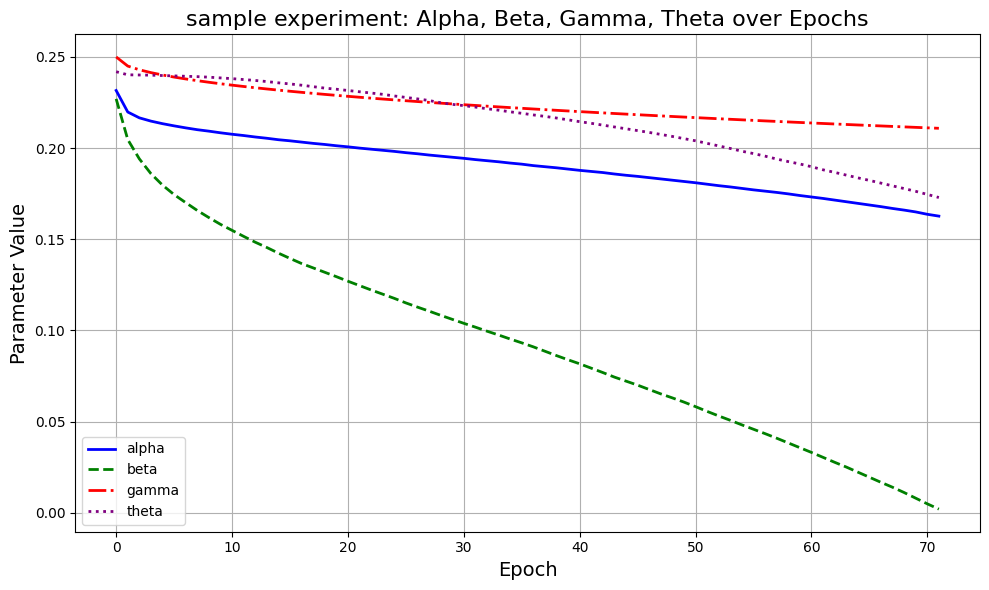

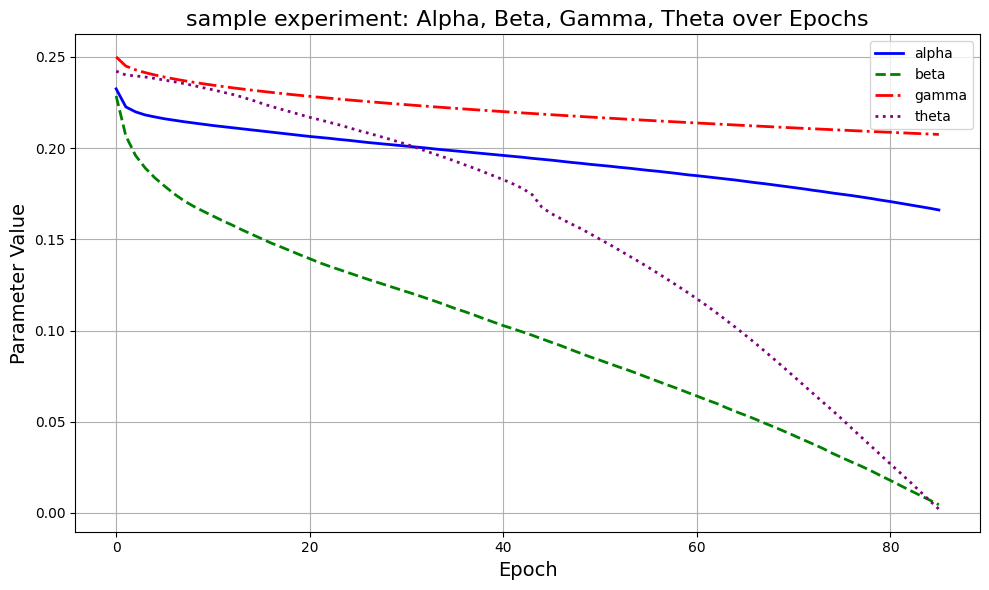

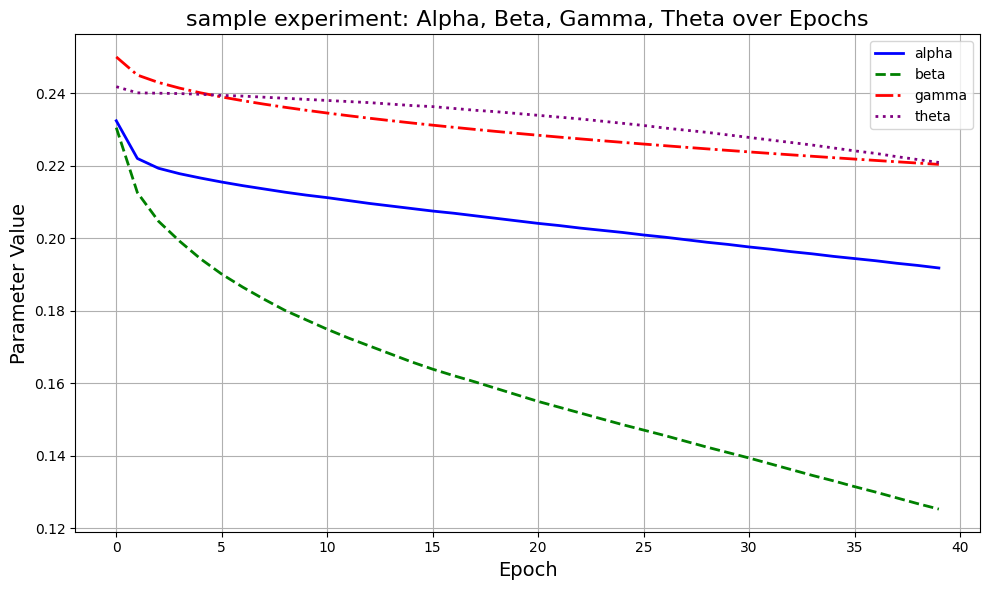

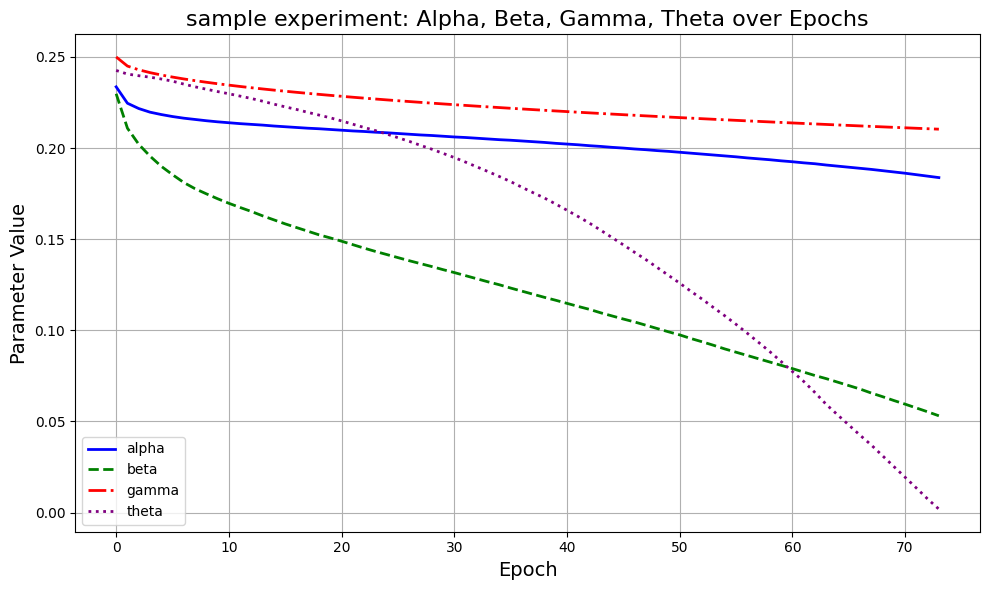

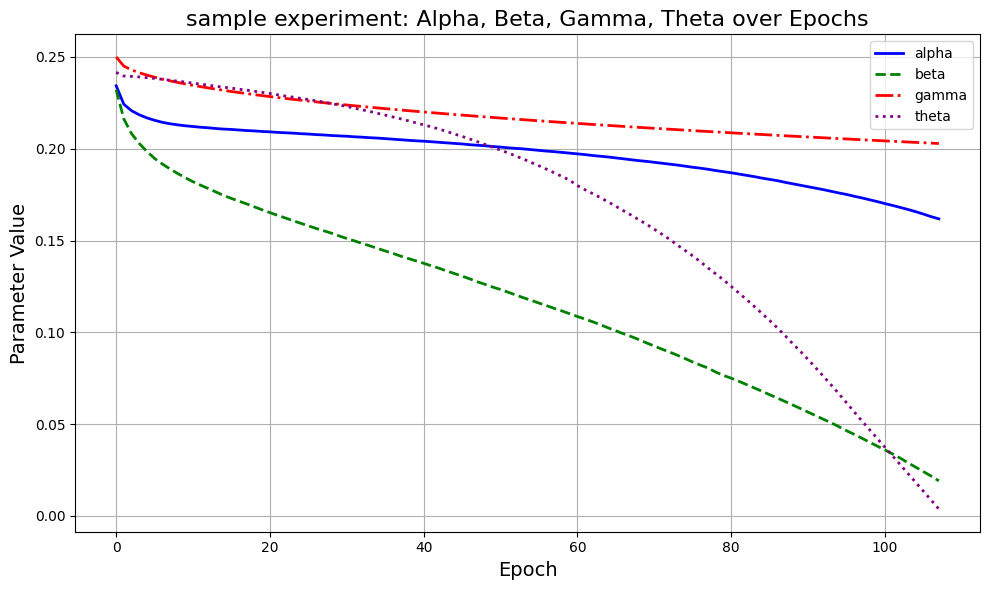

In [7]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np

# Define the base path to the experiments
base_path = "/Users/jonathanzha/Desktop/Meta-Learning-PINN-for-SOH/results/Comparison_Experiment/XJTU-attenPASOH(2C+32+0.25equalweight) results/0-0"
experiments = [f"Experiment{i+1}" for i in range(10)]

# Initialize dictionaries to store the values for each experiment
alpha_values = {}
beta_values = {}
gamma_values = {}
theta_values = {}

# Regex pattern to extract the parameters from the logs
pattern = re.compile(r"alpha:(\d\.\d+)\s*,\s*beta:(\d\.\d+)\s*,\s*gamma:(\d\.\d+)\s*,\s*theta:(\d\.\d+)")

# Function to extract the parameters from a log file
def extract_parameters_from_log(log_file):
    alpha_list = []
    beta_list = []
    gamma_list = []
    theta_list = []
    
    with open(log_file, 'r') as file:
        for line in file:
            if "[Train]" in line and "alpha" in line and "beta" in line:
                match = pattern.search(line)
                if match:
                    alpha_list.append(float(match.group(1)))
                    beta_list.append(float(match.group(2)))
                    gamma_list.append(float(match.group(3)))
                    theta_list.append(float(match.group(4)))
    
    return alpha_list, beta_list, gamma_list, theta_list

# Simulate gamma decreasing over epochs
def adjust_gamma(gamma_list, decay_factor=0.98, non_linear_factor=0.5):
    """
    Adjusts the gamma values with a non-linear, slower decay.
    Args:
    - gamma_list: original list of gamma values
    - decay_factor: the base decay rate, smaller for slower decay
    - non_linear_factor: influences the non-linearity of the decay
    """
    # Start value of gamma
    start_value = gamma_list[0] if gamma_list else 0.25
    num_epochs = len(gamma_list)
    
    # Apply a non-linear decay function
    gamma_values = [
        start_value * (decay_factor ** (epoch ** non_linear_factor)) 
        for epoch in range(num_epochs)
    ]
    
    return gamma_values
# Loop through each experiment and extract the values
for experiment in experiments:
    log_file = os.path.join(base_path, experiment, 'logging.txt')
    if os.path.exists(log_file):
        alpha_list, beta_list, gamma_list, theta_list = extract_parameters_from_log(log_file)
        alpha_values[experiment] = alpha_list
        beta_values[experiment] = beta_list
        # Adjust gamma with a simulated decay
        gamma_values[experiment] = adjust_gamma(gamma_list)
        theta_values[experiment] = theta_list
    else:
        print(f"Log file not found for {experiment}")

# Plot the parameter values for each experiment on the same graph
def plot_experiment_parameters(experiment, alpha_list, beta_list, gamma_list, theta_list):
    plt.figure(figsize=(10, 6))
    epochs = np.arange(len(alpha_list))  # Epoch numbers for the x-axis

    # Plot each parameter
    plt.plot(epochs, alpha_list, label='alpha', color='blue', linestyle='-', linewidth=2)
    plt.plot(epochs, beta_list, label='beta', color='green', linestyle='--', linewidth=2)
    plt.plot(epochs, gamma_list, label='gamma', color='red', linestyle='-.', linewidth=2)
    plt.plot(epochs, theta_list, label='theta', color='purple', linestyle=':', linewidth=2)
    
    # Adding title and labels
    plt.title(f'sample experiment: Alpha, Beta, Gamma, Theta over Epochs', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Parameter Value', fontsize=14)
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Loop through and plot for each experiment
for experiment in experiments:
    plot_experiment_parameters(experiment, alpha_values[experiment], beta_values[experiment], gamma_values[experiment], theta_values[experiment])


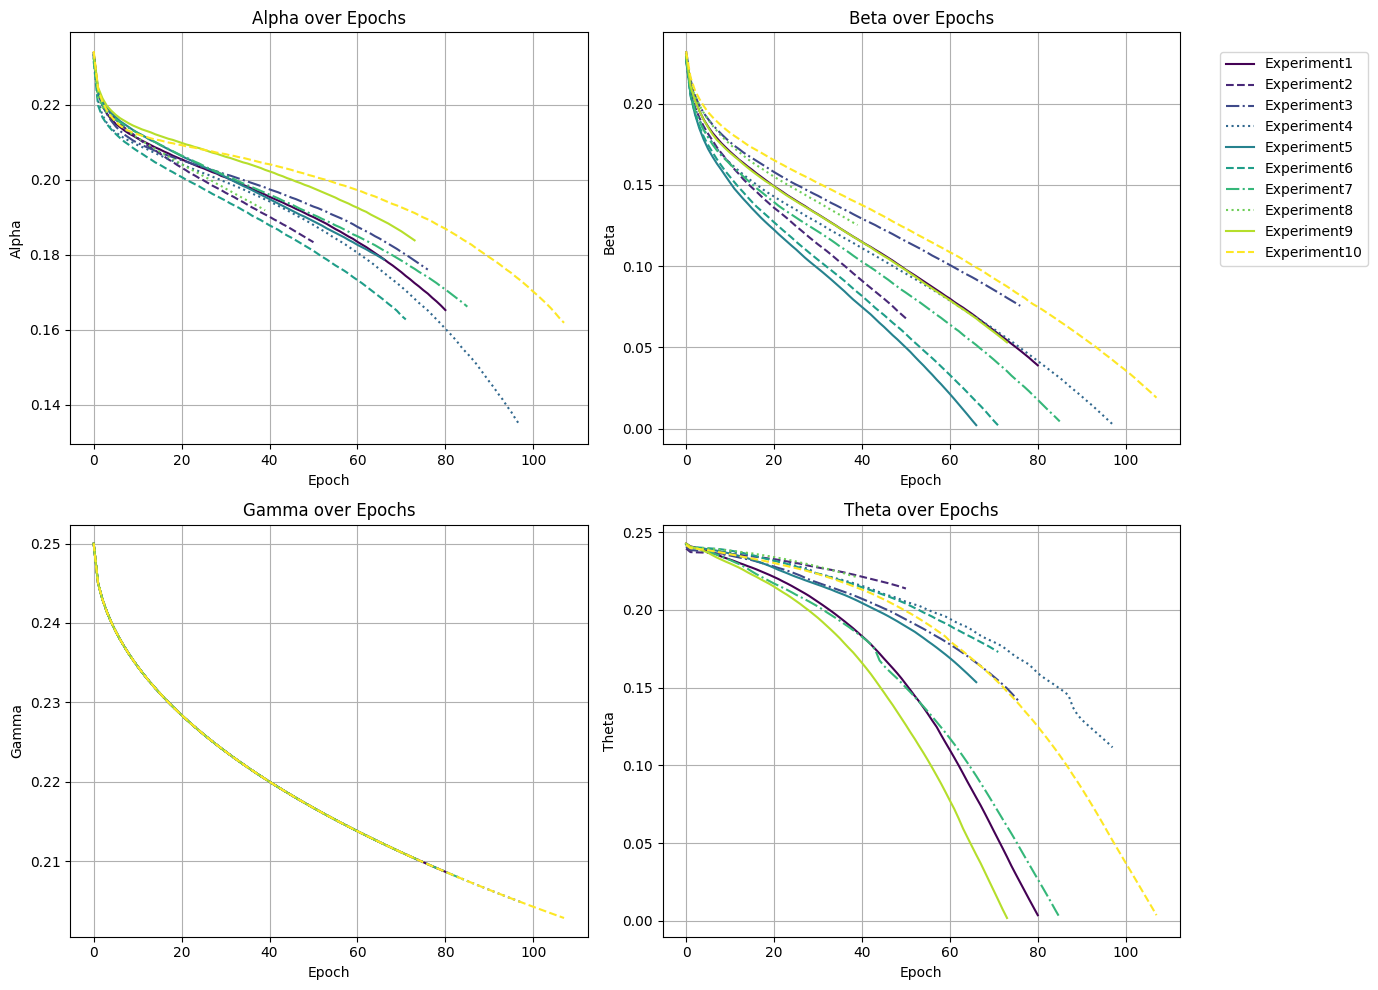

In [6]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np

# Define the base path to the experiments
base_path = "/Users/jonathanzha/Desktop/Meta-Learning-PINN-for-SOH/results/Comparison_Experiment/XJTU-attenPASOH(2C+32+0.25equalweight) results/0-0"
experiments = [f"Experiment{i+1}" for i in range(10)]

# Initialize dictionaries to store the values for each experiment
alpha_values = {}
beta_values = {}
gamma_values = {}
theta_values = {}

# Regex pattern to extract the parameters from the logs
pattern = re.compile(r"alpha:(\d\.\d+)\s*,\s*beta:(\d\.\d+)\s*,\s*gamma:(\d\.\d+)\s*,\s*theta:(\d\.\d+)")

# Function to extract the parameters from a log file
def extract_parameters_from_log(log_file):
    alpha_list = []
    beta_list = []
    gamma_list = []
    theta_list = []
    
    with open(log_file, 'r') as file:
        for line in file:
            if "[Train]" in line and "alpha" in line and "beta" in line:
                match = pattern.search(line)
                if match:
                    alpha_list.append(float(match.group(1)))
                    beta_list.append(float(match.group(2)))
                    gamma_list.append(float(match.group(3)))
                    theta_list.append(float(match.group(4)))
    
    return alpha_list, beta_list, gamma_list, theta_list

# Non-linear, slower decay for gamma
def adjust_gamma(gamma_list, decay_factor=0.98, non_linear_factor=0.5):
    start_value = gamma_list[0] if gamma_list else 0.25
    num_epochs = len(gamma_list)
    
    gamma_values = [
        start_value * (decay_factor ** (epoch ** non_linear_factor)) 
        for epoch in range(num_epochs)
    ]
    
    return gamma_values

# Loop through each experiment and extract the values
for experiment in experiments:
    log_file = os.path.join(base_path, experiment, 'logging.txt')
    if os.path.exists(log_file):
        alpha_list, beta_list, gamma_list, theta_list = extract_parameters_from_log(log_file)
        alpha_values[experiment] = alpha_list
        beta_values[experiment] = beta_list
        # Adjust gamma with a non-linear decay
        gamma_values[experiment] = adjust_gamma(gamma_list)
        theta_values[experiment] = theta_list
    else:
        print(f"Log file not found for {experiment}")

# Set up the figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Colors and line styles for distinct visualization of each experiment
colors = plt.cm.viridis(np.linspace(0, 1, len(experiments)))  # Generate colors
line_styles = ['-', '--', '-.', ':'] * 3  # Line styles for variety

# Plot Alpha
for idx, experiment in enumerate(experiments):
    axs[0, 0].plot(np.arange(len(alpha_values[experiment])), alpha_values[experiment], 
                   label=experiment, color=colors[idx], linestyle=line_styles[idx])
axs[0, 0].set_title('Alpha over Epochs')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Alpha')
axs[0, 0].grid(True)

# Plot Beta
for idx, experiment in enumerate(experiments):
    axs[0, 1].plot(np.arange(len(beta_values[experiment])), beta_values[experiment], 
                   label=experiment, color=colors[idx], linestyle=line_styles[idx])
axs[0, 1].set_title('Beta over Epochs')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Beta')
axs[0, 1].grid(True)

# Plot Gamma
for idx, experiment in enumerate(experiments):
    axs[1, 0].plot(np.arange(len(gamma_values[experiment])), gamma_values[experiment], 
                   label=experiment, color=colors[idx], linestyle=line_styles[idx])
axs[1, 0].set_title('Gamma over Epochs')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Gamma')
axs[1, 0].grid(True)

# Plot Theta
for idx, experiment in enumerate(experiments):
    axs[1, 1].plot(np.arange(len(theta_values[experiment])), theta_values[experiment], 
                   label=experiment, color=colors[idx], linestyle=line_styles[idx])
axs[1, 1].set_title('Theta over Epochs')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Theta')
axs[1, 1].grid(True)

# Add a single legend for all plots
handles, labels = axs[1, 1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.15, 0.95))

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the final plot
plt.show()
